## 11주 matrix inverse method 회귀분석
데이터가 다음과 같이 주어졌을 때:

* x [1,2],[1,4],[1,6]

* y 3,6,7



```회귀식```을 도출해보자.

* 1) matrix inverse method로 $\hat{w}$을 계산,

* 2) 예측과 실제의 오류 합계를 계산,

* 3) 입력 데이터와 회귀선의 그래프를 작성한다.

In [0]:
import os
import pyspark

1) matrix inverse method로 $\hat{w}$을 계산

In [0]:
import numpy as np

x=np.array([2,4,6])
x_=np.array([np.ones(len(x)),x])
y=np.array([3,6,7])

In [0]:
x_=x_.T
print(x_)

[[1. 2.]
 [1. 4.]
 [1. 6.]]

In [0]:
# X^T X 계산
f"x shape: {x_.shape} xT shape:{x_.T.shape}"

Out[70]: 'x shape: (3, 2) xT shape:(2, 3)'

In [0]:
xTx=np.dot(x_.T,x_)
print("xTx=",xTx)

xTx= [[ 3. 12.]
 [12. 56.]]

In [0]:
# X^T X 의 inverse 계산
xTxI=np.linalg.inv(xTx)
print("xTxI=",xTxI)

xTxI= [[ 2.33 -0.5 ]
 [-0.5 0.12]]

In [0]:
# X^T y 계산
xTyT=np.dot(x_.T,y)
print("xTyT=",xTyT)

xTyT= [16. 72.]

1) 답

In [0]:
# 전체 식 계산
print("weights=",np.dot(xTxI,xTyT))
# weights가 바로 w hat이다

weights= [1.33 1. ]

In [0]:
# 전체 식 한 줄로 계산하기
w1, w0=np.dot(np.linalg.inv(np.dot(x_.T, x_)), np.dot(x_.T, y))
w0, w1

Out[83]: (1.0, 1.3333333333333286)

2) 예측과 실제의 오류 합계를 계산

In [0]:
yhat=x*1.0+1.3

In [0]:
f"predicted - actual: {yhat-y}"

Out[94]: 'predicted - actual: [ 0.30 -0.70 0.30]'

2) 답

In [0]:
f"error: {np.sum(np.power(yhat-y,2))}"

Out[95]: 'error: 0.67'

3) 입력 데이터와 회귀선 그래프 그리기

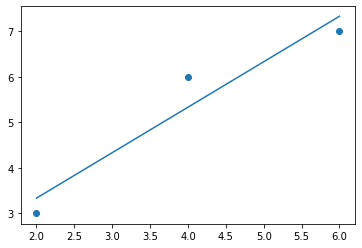

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# compute yhat from the model values of b0 and b1
x=np.array([2,4,6])
x_=np.array([np.ones(len(x)),x])
y=np.array([3,6,7])
x_=x_.T

w1, w0=np.dot(np.linalg.inv(np.dot(x_.T, x_)), np.dot(x_.T, y))
yhat=x*w0+w1
fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(x,y)
ax.plot(x,yhat)